<a href="https://colab.research.google.com/github/sanglirama/nlp-capstone-project/blob/master/Capstone_IT__Ticket_Distribution_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTOMATIC TICKET ASSIGNMENT**

The Real Problem One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. 

Project Description
In this capstone project, the goal is to build a classifier that can classify the tickets by analysing 
text.
Details about the data and dataset files are given in below link,
https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

Milestone 1: Pre-Processing, Data Visualisation and EDA Overview

*   Exploring the given Data files
*   Understanding the structure of data
*   Missing points in data
*   Finding inconsistencies in the data
*   Visualizing different patterns  
*   Visualizing different text features
*   Dealing with missing values


**Install the pre requisite libraries**

In [1]:
!pip install langdetect
!pip install googletrans

     |████████████████████████████████| 983kB 7.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=84112f5f1ac4b7a360b7694be34db3c1713cf3cb9961268fae3c47dc9660ec4d
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect
  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=4c979dfeb6d001e3edc344d8c62268049bca3ccfd45bbf9fca36eff3250e91d6
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [2]:
#Import all prerequisite libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import preprocessing 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import accuracy_score, classification_report, confusion_matrix, homogeneity_score, silhouette_score, roc_auc_score, precision_score, recall_score, roc_curve, auc
from sklearn import model_selection, svm

from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPool1D, SpatialDropout1D, GRU
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from collections import OrderedDict, Counter

import re

import string
from string import punctuation as punc

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.util import ngrams

from wordcloud import WordCloud, STOPWORDS 

from textblob import TextBlob
from tqdm import tqdm

from spacy.lang.en import English

import googletrans
from googletrans import Translator

from langdetect import detect, DetectorFactory

from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
project_path = '/content/drive/My Drive/Colab Notebooks/Capstone Project IT Helpdesk Ticket Optimization'
os.chdir(project_path)

In [0]:
df = pd.read_excel('input_data.xlsx')

Let us try to understand the data

In [9]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [11]:
# Find index of NaN values
SD_nan_index = df.loc[pd.isna(df["Short description"]), :].index
Desc_nan_index = df.loc[pd.isna(df['Description']),:].index
print('Short description null at index ', SD_nan_index)
print('Short description null at index ', Desc_nan_index)

Short description null at index  Int64Index([2604, 3383, 3906, 3910, 3915, 3921, 3924, 4341], dtype='int64')
Short description null at index  Int64Index([4395], dtype='int64')


In [0]:
#Converting all rows to String 
df['Short description']=df['Short description'].apply(str)
df['Description']=df['Description'].apply(str)
df['Caller']=df['Caller'].apply(str)

EDA - Let's Visualize the Data distributrion

In [0]:
#Looking into featurewise distribution

In [0]:
#Start with Dataset Distribution by "Ässignment Group" Column

Text(0, 0.5, 'Assignment Groups')

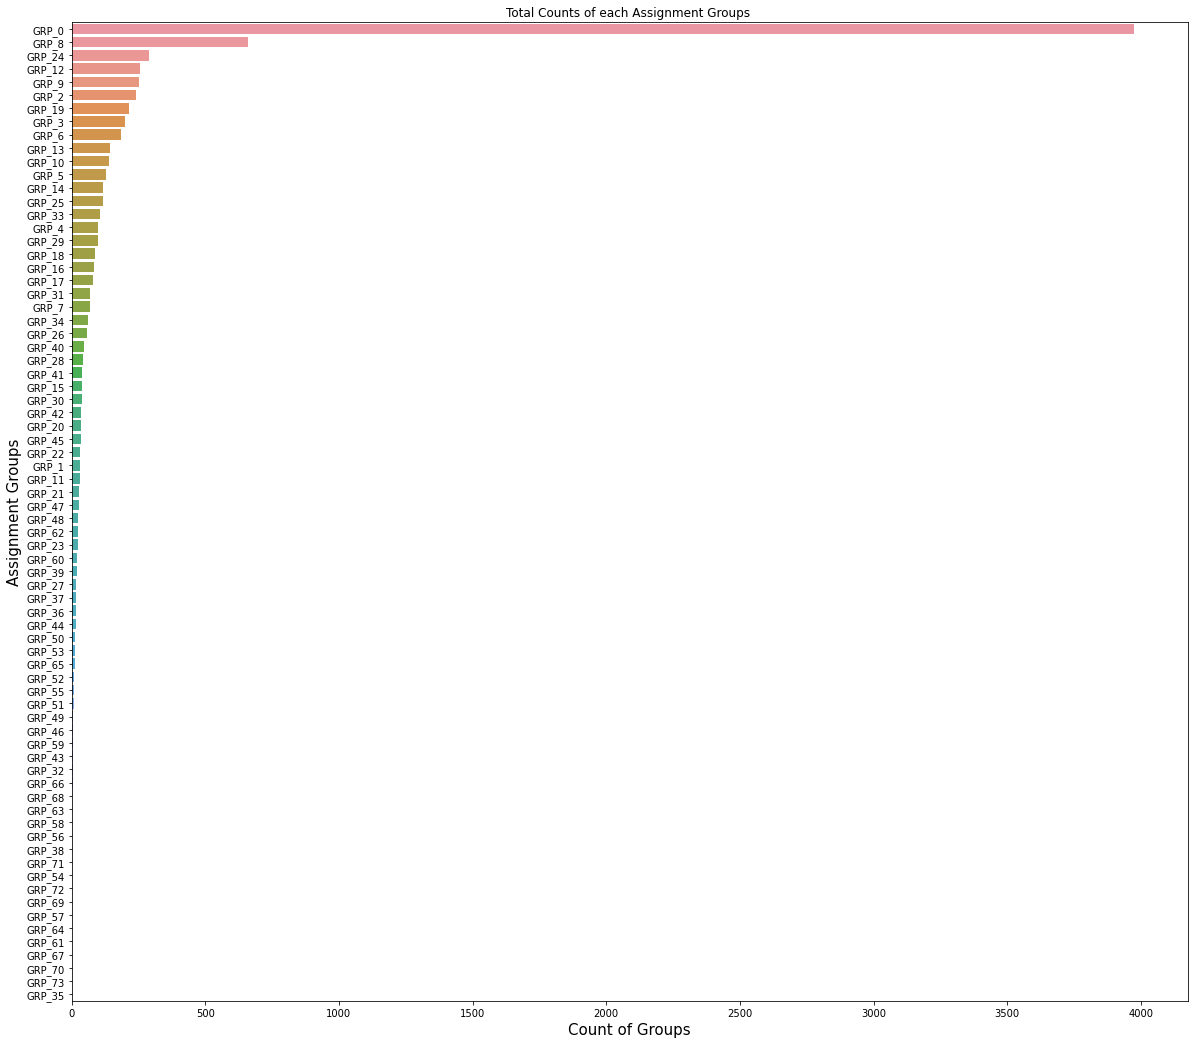

In [17]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,18))


x = df['Assignment group'].value_counts()
sns.barplot(x, x.index, ax=ax1)
plt.title('Total Counts of each Assignment Groups ')
plt.gca().set_xlabel('Count of Groups',fontsize=15)
plt.gca().set_ylabel('Assignment Groups',fontsize=15)

In [0]:
#Group Zero - GP_0 has the maximum no of entries for Assignment Group column

In [0]:
#Now lets check how data is distribution for Column "Caller"

Text(0, 0.5, 'Callers')

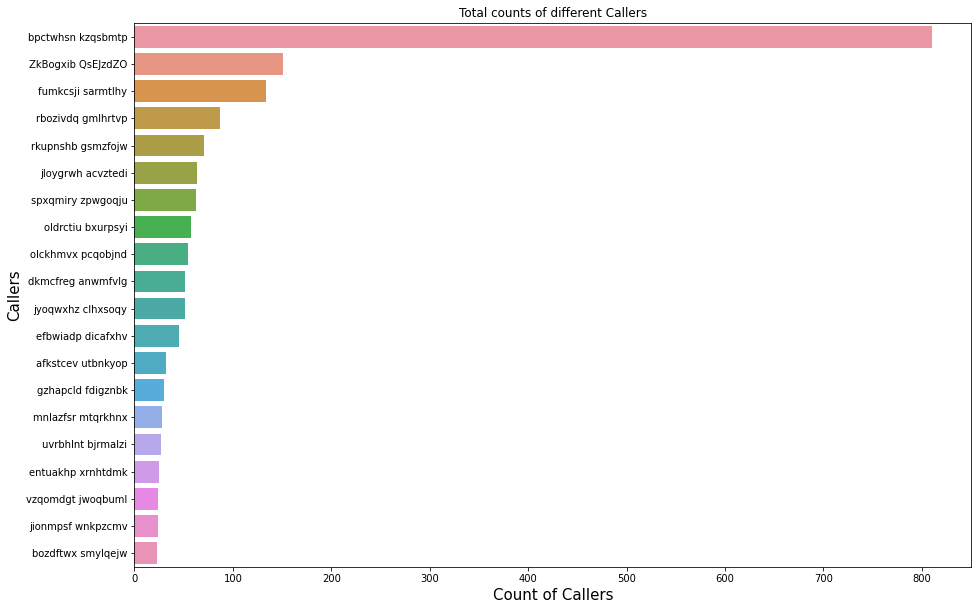

In [20]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,10))

x = df.groupby(['Caller']).size().sort_values(ascending=False).head(20)
sns.barplot(x, x.index, ax=ax1)
plt.title('Total counts of different Callers')
plt.gca().set_xlabel('Count of Callers',fontsize=15)
plt.gca().set_ylabel('Callers',fontsize=15)

In [0]:
#Now for the caller with Maximum Values check how the relationship with Assignment Group

In [22]:
df[df['Caller']=='bpctwhsn kzqsbmtp']['Assignment group'].value_counts()

GRP_8     362
GRP_9     153
GRP_5      96
GRP_6      89
GRP_10     60
GRP_60     16
GRP_12      8
GRP_45      7
GRP_1       6
GRP_13      4
GRP_18      3
GRP_47      2
GRP_57      1
GRP_14      1
GRP_44      1
GRP_29      1
Name: Assignment group, dtype: int64

In [0]:
#Now check by Short Description and Assignment Group

In [24]:
#Distribution by ShortDescription and Group GRP_8
dfSDG = df.groupby(['Short description','Assignment group']).size().sort_values(ascending=False).reset_index()

dfSDG[dfSDG['Assignment group']=='GRP_8']['Short description'].head(8)

45     job Job_3028 failed in job_scheduler at: 08/24...
115                abended job in job_scheduler: Job_593
138    job Job_549 failed in job_scheduler at: 10/07/...
157    abended job in job_scheduler: bkbackup_tool_re...
160    abended job in job_scheduler: bk_hana_SID_62_e...
161    abended job in job_scheduler: bk_hana_SID_62_e...
166    job Job_749 failed in job_scheduler at: 08/27/...
167    job SID_41arc2 failed in job_scheduler at: 08/...
Name: Short description, dtype: object

In [0]:
#Distribution by Assignment group and Short Description

In [26]:
#Group by ShortDescription and Group GRP_9
dfSDG = df.groupby(['Short description','Assignment group']).size().sort_values(ascending=False).reset_index()

dfSDG[dfSDG['Assignment group']=='GRP_9']['Short description'].head(8)

52     abended job in job_scheduler: Job_1148
55     abended job in job_scheduler: Job_1141
92     abended job in job_scheduler: Job_1320
104    abended job in job_scheduler: Job_1142
113    abended job in job_scheduler: Job_2114
207    abended job in job_scheduler: Job_1305
243               update of ae to bw and hana
519                           issue with bobj
Name: Short description, dtype: object

**Dataset Distribution by "Short Description"**

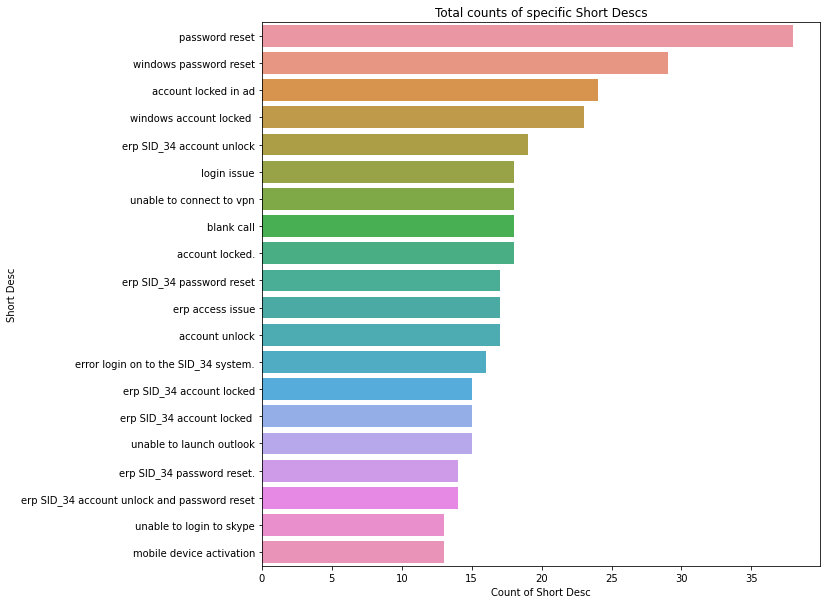

In [29]:


fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
x = df['Short description'].value_counts()[:20]
sns.barplot(x, x.index, ax=ax1)
plt.title('Total counts of specific Short Descs')
plt.gca().set_xlabel('Count of Short Desc')
plt.gca().set_ylabel('Short Desc')

plt.show()

Moving onto Feature Engineering and EDA

In [0]:
df_en = df.copy()

In [31]:
df_en.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
#Convert all rows into String 
df_en['Short description']=df_en['Short description'].apply(str)
df_en['Description']=df_en['Description'].apply(str)
df_en['Caller']=df_en['Caller'].apply(str)

Now we have to clean the data , As you can see there is caller email id/ caller name  in description column let us remove it and clean

In [0]:
caller_list = df_en["Caller"].str.split(" ", n = 1, expand = True)

caller_fname = caller_list[0]
caller_lname = caller_list[1]

caller_fname_list = caller_fname.to_list()
caller_lname_list = caller_lname.to_list()

df_en.Description = df_en.Description.apply(lambda x: ' '.join([word for word in x.split() if word not in caller_fname_list]))
df_en.Description = df_en.Description.apply(lambda x: ' '.join([word for word in x.split() if word not in caller_lname_list]))

In [0]:
#Now lets create a new column called Complete Description , combining all 3 independent attributes into 1
df_en['Complete_Description'] = df_en['Short description'].str.cat(df_en['Description'],sep=" ")

In [0]:
#Remove non consecutive duplicates
df_en['Complete_Description'] = (df_en['Complete_Description'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))

In [38]:
#After cleaning and creating a new column by combining the 3 attributes, see how your data looks 
df_en.head(4)

,Short description,Description,Caller,Assignment group,Complete_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com hel...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com hi ...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page
